![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 5: Support Vector Machines


**Resources (code patched and updated from):**
* MNIST
* Sklearn
* Aurelien Geron's O'Reilly's "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"
* Lazy Programmer Lecture Series
* Andrew Ng Lectures

# SVM gentle introduction


## SVM - Image Clasification
The UUID is **#S5C1**. You can use it to refer to the slides in Session 5. 

### Load and prepare data

In [1]:
# SVM is used within sklearn as Support Vector Classifier
from sklearn.svm import SVC
from datetime import datetime

In [2]:
# Let's import MNIST directly from keras
from keras.datasets import mnist

# Load data using keras mnist utils
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Exploring the dataset
print(train_X.shape, train_Y.shape)

(60000, 28, 28) (60000,)


Text(0.5, 1.0, ' Digit 5')

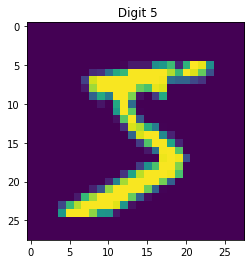

In [4]:
# Exploring the dataset visually
import matplotlib.pyplot as plt

plt.imshow(train_X[0])
plt.title(" Digit " + str(train_Y[0]) )

In [5]:
# Checking the value range over the dataset

# Check values for row 6, column 6
train_X[6][6]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 175,
       253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
# Let's normalize the input so that SVM can perform better

# First we need to flatten the images. We can use numpy reshape for that
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

import numpy as np
type(train_X)

# Find size of one-dimensional vector for each image. Yes, it is 784
num_pixels = train_X.shape[1] * train_X.shape[2] # find size of one-dimensional vector
print(num_pixels)

784


In [7]:
# Now, let's flatten Train and Test images using numpy reshape
train_X_reshaped = train_X.reshape(train_X.shape[0], num_pixels).astype('float32') 
test_X_reshaped = test_X.reshape(test_X.shape[0], num_pixels).astype('float32') 

print(train_X_reshaped.shape, test_X_reshaped.shape)

(60000, 784) (10000, 784)


In [8]:
# Now let's normalize the values from (0..255) to (0..1)

train_X_normalized = train_X_reshaped / 255
test_X_normalized = test_X_reshaped / 255

In [9]:
# Now let's test the values of array
train_X_normalized[0][100:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Alternative: mean=0, variance=1

In [10]:
# Let's apply sklearns mean=0, variance=1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_meanvar = scaler.fit_transform(train_X_reshaped)
test_X_meanvar = scaler.transform(test_X_reshaped)

In [11]:
# Now let's test the values of array
train_X_meanvar[0][100:300]

array([-2.62596905e-01, -2.47855902e-01, -2.21947014e-01, -1.87211409e-01,
       -1.47640124e-01, -1.08164370e-01, -7.68121108e-02, -4.70752977e-02,
       -3.02019659e-02, -1.52412439e-02, -5.28371939e-03,  0.00000000e+00,
        0.00000000e+00, -4.08251677e-03, -7.76342256e-03, -1.48932543e-02,
       -2.39627492e-02, -5.03408983e-02, -7.87674636e-02, -1.16181545e-01,
       -1.61247566e-01, -2.11961642e-01, -2.66898721e-01, -3.25678021e-01,
       -3.90241563e-01, -4.52076375e-01, -4.99397993e-01, -5.23428321e-01,
       -5.17618895e-01, -4.80902404e-01, -4.23079699e-01, -3.56740385e-01,
       -2.83683658e-01, -2.16836661e-01, -1.58524379e-01, -1.08784586e-01,
       -7.09225312e-02, -3.89534794e-02, -1.42523851e-02, -5.77049796e-03,
        0.00000000e+00,  0.00000000e+00, -1.19017400e-02, -2.20501553e-02,
       -5.18380739e-02, -9.06597003e-02, -1.39667109e-01, -1.97082117e-01,
       -2.64384717e-01, -3.40730429e-01, -4.22535747e-01, -5.15408635e-01,
       -5.84660351e-01, -

### Fit the SVC

**Be careful!** Train duration on Google Colab: 0:16:05.266673 !!!

In [12]:
# Call the SVC model
model = SVC()

In [13]:
t0 = datetime.now()
model.fit(train_X_normalized, train_Y)
print("Train duration:", datetime.now()-t0)

Train duration: 0:03:55.473324


### Evaluate the SVC

**Be careful!** Train score on Google Colab: 

*   Train score duration on Google Colab:  0:27:02.376792 !!
*   Test score duration on Google Colab:  0:04:25.458038 !!


In [14]:
# The model score returns the accuracy
t0 = datetime.now()
print("Train score:", model.score(train_X_normalized, train_Y), "duration: ", datetime.now()-t0)

Train score: 0.9899166666666667 duration:  0:07:31.997300


In [15]:
# The model score returns the accuracy
t0 = datetime.now()
print("Test score:", model.score(test_X_normalized, test_Y), "duration: ", datetime.now()-t0)

Test score: 0.9792 duration:  0:01:22.757515


## SVM - Spam classifier

The UUID is **#S5C2**. You can use it to refer to the slides in Session 5. 

### Load the data

In [125]:
import pandas as pd
"""
We need to define a particular encoding, because the original file contain invalid characters.
So depending on your Pandas, an error can be thrown such as:

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte

Usually, when working with text, you will find this issues scattered around. Since nowadays we 
tend to use emojis, symbols and other stuff which is not recognized by utf-8
"""
df_spam = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [126]:
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [127]:
# Let's drop the columns that are not useful

df_spam = df_spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
# Let's also rename the columns so we have something better than "v1" and "v2"

df_spam.columns = ['labels', 'data']
df_spam.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data preprocessing

In [129]:
# Let's create a column for binary labels 
df_spam['binary_labels'] = df_spam['labels'].map({'ham':0, 'spam':1})
df_spam.head()

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [130]:
# Let's create our "Y" matrix by extracting our numpy array

"""
We really don't need to do this, as Sklearn accepts strings and series as labels.
In any case, it is good practice to do this, as we have a numerical representation
of the data in case that we want to build our own model.
"""

Y = df_spam['binary_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [131]:
Y.shape

(5572,)

In [132]:
# Now let's create our "X" matrix, our input features for every sample

"""
Here we can use different approaches for our input matrix, whether that is TF-IDF
or CountVectorizer which does basically raw counts.

Here is the TF-IDF version

We need to use the decode error to ignore invalid utf-8 characters
"""
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(decode_error='ignore')
X_tfidf = tfidf.fit_transform(df_spam['data'])

In [133]:
"""
Here we can use different approaches for our input matrix, whether that is TF-IDF
or CountVectorizer which does basically raw counts.

Here is the CountVectorizer version

We need to use the decode error to ignore invalid utf-8 characters
"""

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(decode_error='ignore')
X_rawcount = count_vectorizer.fit_transform(df_spam['data'])

In [134]:
# Let's create the datasets 
from sklearn.model_selection import train_test_split

Xtrain_tfidf, Xtest_tfidf, Ytrain_tfidf, Ytest_tfidf = train_test_split(X_tfidf, Y, test_size=0.2)
Xtrain_rawcount, Xtest_rawcount, Ytrain_rawcount, Ytest_rawcount = train_test_split(X_rawcount, Y, test_size=0.2)

In [135]:
Xtrain_tfidf.shape

(4457, 8672)

In [67]:
#tfidf.get_feature_names_out()

### Visualize the dataset

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Let's create a function to visualize our data in a word cloud

# We create our function that asks for a label
def visualize(label):

    # We initialize a "words" string
    words = ''

    # Loop through the DF, pass every message ('data') that has the same label noted in the string above
    for msg in df_spam[df_spam['labels'] == label]['data']:
        
        # Convert the message to lowercase
        msg = msg.lower()
        
        # Append the message to the words string and add a space
        words += msg + ' '

    # Generate a WordCloud with all the looped words
    wordcloud = WordCloud(width=600, height=400).generate(words)

    # Show the wordcloud with plt.imshow
    plt.imshow(wordcloud)

    # Take the axis off
    plt.axis('off')

    # Set a title with the label
    plt.title(label)

    # Show the image
    plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
visualize('spam')

In [ ]:
visualize('ham')

### Fit the SVC for TF-IDF

In [156]:
# Let's fit the SVC model
from sklearn.svm import SVC

# We will see what C stands for in next examples
model_tfidf = SVC(kernel='linear', C=2.)

In [157]:
"""
This time training the SVM is way faster, because we have less data. And it is also
just vectorized strings
"""

from datetime import datetime

t0 = datetime.now()
model_tfidf.fit(Xtrain_tfidf, Ytrain_tfidf)
print("train duration:", datetime.now() - t0)

train duration: 0:00:00.680985


### Evaluate the SVC for TF-IDF


In [158]:
t0 = datetime.now()
print("train score:", model_tfidf.score(Xtrain_tfidf, Ytrain_tfidf), "duration:", datetime.now() - t0)

train score: 0.9993269015032533 duration: 0:00:00.583515


In [159]:
t0 = datetime.now()
print("test score:", model_tfidf.score(Xtest_tfidf, Ytest_tfidf), "duration:", datetime.now() - t0)

test score: 0.9838565022421525 duration: 0:00:00.155245


### Fit the SVC for Raw Count

In [74]:
# Let's fit the SVC model
from sklearn.svm import SVC

# We will see what C stands for in next examples
model_rawcount = SVC(kernel='linear', C=2.)

In [75]:
"""
This time training the SVM is way faster, because we have less data. And it is also
just vectorized strings
"""

from datetime import datetime

t0 = datetime.now()
model_rawcount.fit(Xtrain_rawcount, Ytrain_rawcount)
print("train duration:", datetime.now() - t0)

train duration: 0:00:00.458573


### Evaluate the SVC for Raw Count

In [76]:
t0 = datetime.now()
print("train score:", model_rawcount.score(Xtrain_rawcount, Ytrain_rawcount), "duration:", datetime.now() - t0)

train score: 1.0 duration: 0:00:00.343196


In [84]:
t0 = datetime.now()
print("test score:", model_rawcount.score(Xtest_rawcount, Ytest_rawcount), "duration:", datetime.now() - t0)

test score: 0.9820627802690582 duration: 0:00:00.097037


### Predictions

We can dive a little bit deeper in that accuracy and see what is going on

In [160]:
# We are getting close to 100% accuracy in TF-IDF, but let's see what is wrong with our model
df_spam['predictions'] = model_tfidf.predict(X_tfidf)
df_spam.head()

,labels,data,binary_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [161]:
# Let's look at things that should be spam
print("*** things that should be spam ***")

# We filter the dataframe with elementwise AND operation to check when pred=0 but labels=1
sneaky_spam = df_spam[(df_spam['predictions'] == 0) & (df_spam['binary_labels'] == 1)]['data']

# We loop through each message in sneaky_spam and check messages that should have been spam (FALSE NEGATIVES)
for msg in sneaky_spam:
  print(msg)

*** things that should be spam ***
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
SMS. ac sun0819 posts HELLO:\You seem cool
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Call FREEPHONE 0800 542 0578 now!
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Back 2 work 2morro half term over! Can U C me 2nite 4 some sexy passion B4 I have 2 go back? Chat NOW 09099726481 Luv DENA Calls å£1/minMobsmoreLKPOBOX177HP51FL
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?
LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
Sorry I mi

In [162]:
# Let's look at things that should be spam
print("*** things that should be spam ***")

# We filter the dataframe with elementwise AND operation to check when pred=1 but labels=0
sneaky_spam = df_spam[(df_spam['predictions'] == 1) & (df_spam['binary_labels'] == 0)]['data']

# We loop through each message in sneaky_spam and check messages that should have been spam (FALSE POSITIVES)
for msg in sneaky_spam:
  print(msg)

*** things that should be spam ***
K..u also dont msg or reply to his msg..
These won't do. Have to move on to morphine
I liked the new mobile
K k:) sms chat with me.


### Let's plot PR curves, we need to update sklern to version 0.22

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


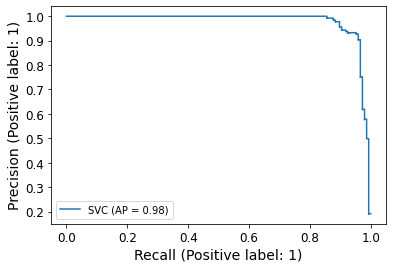

In [82]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model_tfidf, Xtest_tfidf, Ytest_tfidf)


/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


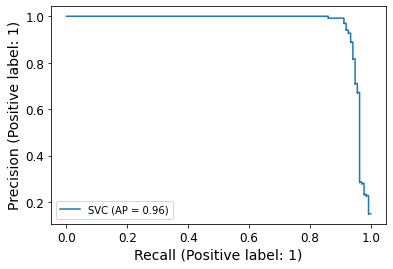

In [83]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model_rawcount, Xtest_rawcount, Ytest_rawcount)

## SVM - Medical diagnosis

The UUID is **#S5C3**. You can use it to refer to the slides in Session 5.

### Load the data

In [163]:
from sklearn.datasets import load_breast_cancer

# Load the brest cancer dataset
data = load_breast_cancer()

In [164]:
# As stated, we get 569 instances and 30 features or attributes
data.data.shape

(569, 30)

In [165]:
# The description of the dataset is associated with it
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Data preprocessing

In [166]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3)

In [167]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler scales real value variables

"""
The standarization is done by removing the mean and scaling to unit variance.

The standardized score of a sample "X" is calculated as:

z = (x - u)/s

    * u : the mean of the training samples
    * s : standard deviation
"""
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Fit the SVC - linear kernel

Check the slides related with **#S5C3** for more information on kernel functions


In [168]:
"""
Even if we are not experts at breast cancer detection, the beauty of machine learning
is that we can extract information from the data even if we are not doctors. 
It doens't matter what the data is, it does not affect how the algorithm works.
"""
from sklearn.svm import SVC

model = SVC(kernel='linear')
# model = SVC()
model.fit(Xtrain, Ytrain)

SVC(kernel='linear')

### Evaluate the SVC - linear kernel

In [169]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9949748743718593
test score: 0.9649122807017544


### Fit the SVC - default RBF kernel

Check the slides related with **#S5C3** for more information on kernel functions


In [172]:
"""
Even if we are not experts at breast cancer detection, the beauty of machine learning
is that we can extract information from the data even if we are not doctors. 
It doens't matter what the data is, it does not affect how the algorithm works.
"""
from sklearn.svm import SVC

model = SVC(kernel='rbf')
# model = SVC()
model.fit(Xtrain, Ytrain)

SVC()

### Evaluate the SVC - default RBF kernel

In [173]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9874371859296482
test score: 0.9649122807017544


### Conclusion

A linear model is good enough so a non-linear model is not needed. As a reminder, just because you can use a more expressive model (non-linear) you don't need to use it. Sometimes, linear models are good enough generalizers and faster to train.

## SVM - Concrete regression

The UUID is **#S5C4**. You can use it to refer to the slides in Session 5.

### Download and load the data

In [95]:
import pandas as pd

df = pd.read_excel('data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Preprocess the data

In [96]:
# We take out those crazy titles and pass the number of each column
df.columns = list(range(df.shape[1]))
df.head()

,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [97]:
# We load the column values as numpy array
# Column 8 is the compressive strenght, the target
X = df[[0,1,2,3,4,5,6,7]].values
Y = df[8].values

In [98]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
Ytest.shape

(340,)

We standardize both input and target

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [100]:
# For the target, this will through an error because expects 2D array and target is 1D
target_scaler = StandardScaler()
Ytrain = target_scaler.fit_transform(Ytrain)
Ytest = target_scaler.transform(Ytest)
Ytest.shape

ValueError: Expected 2D array, got 1D array instead:
array=[43.94237391 24.28334472 53.104131   41.05277999 38.40795006 50.77301264
 52.82696164 66.9481196  40.85834776 35.75425543 15.81657944 51.021224
 50.07664188 38.76923548 33.60506024 36.80422888 23.786922   45.89841732
 40.75906322 26.0621928  33.39821744 14.63826496 63.14221208 23.8903434
 19.35014394 33.21205892 28.79941252 32.82319446 39.300132   28.98557104
 50.93848688 17.20035777 37.43165204 31.25394708 20.08443588 55.49592324
 65.69721315 31.35047372 18.19871902 47.81378165 25.48303296  9.4458212
 30.21973308 14.98920824 41.68020315 51.86376367 41.09966436 37.72192144
 24.48329276 39.300132   38.6306508  38.60376124 41.1617172  37.99702236
 43.58177796 25.57335432 33.35684888 45.70536404 40.14818748 42.32693164
  8.48744956 36.3498642  18.0297974  13.20208645 71.69860924 69.29923276
 76.23536132 35.34253976 59.59042572 53.69225402 16.50398701 72.09850532
 51.021224   13.35515012 32.6266938  34.48758952 41.66503468 67.568648
 27.53077668 52.30364936 29.93015316 56.33708396 19.1991487  12.45193656
 24.00065956 38.21075992 77.29715436 14.98920824 62.93536928 42.919881
 19.0095428  37.231704   31.11605188 40.38950408 69.65776028 26.31040416
 71.98818916 21.6495464  29.23171397 20.27748916 35.22532884 82.5992248
 16.87837248 39.94134468 14.54104884 41.71950328 52.42086028 49.99390476
 10.38350856 19.41564416 47.09810556 33.56369168 12.78840085 36.44570136
 58.60546    21.50475644 68.75060685 52.00717468 35.57006684 71.62276688
 30.44726016 78.80021204 46.23419213 15.60973664 55.45455468 21.78054684
 38.20386516 18.91232668 17.54026944 21.8591471  28.59946448 81.75116932
 44.6980396  21.81984697 21.48062478 74.16693332 74.69782984 40.679084
 31.1787942  29.15794004 31.2677366  39.64487    64.90037588 25.89396066
 36.3009114  39.300132   36.93522932 42.03045696 79.29663476 41.20308576
 32.10988228 23.83518532 39.58971192 54.89607912 18.28490352 56.3991368
 12.24509376 44.20920112 39.28978986 54.27555072 29.89223198 30.6472082
 26.91714304 15.04919265 35.3011712  31.64005364 17.95947085 33.00521612
 38.70028788 42.13387836 22.89749796 25.96566616 37.91704314 20.41607384
 31.35047372 40.06200298 12.5484632  27.66177712 74.36491146 65.99664272
 30.14389072 48.28400428 33.08795324 29.72606826 42.62064842 19.76520849
 34.6806428  29.86810032 40.9348796  44.20782217 55.25460664 44.52360218
 48.69562145 55.82687172 55.89581932 41.05140104 56.8128224  50.52686971
 20.96696516 37.25928304 67.11359384 20.91870184 17.22311048 39.32150576
 23.73865868 10.08979178 26.74477404 26.96540636 36.14922668 23.51802636
 25.3727168  14.69962832 38.21558625 26.84819544 25.42235907 27.82725136
 37.16965116 26.85991653 39.2311844  36.56291228 34.90127512 73.69808964
 12.54156844 30.57136584 26.40003604 33.01900564 32.10269204 44.6118551
 44.284354   17.95395504 48.97348028 24.53845084 80.19984832 33.05347944
 32.76389952 68.09954452 51.03501352 46.24315532 33.79811352 30.43967592
 15.52631004 11.48391226 44.63667624 53.95839176 16.10960674 38.50033984
 12.47262084 48.79421652 79.40005616 16.49916068 33.71882378 38.32797084
 11.39221195 32.05167081 43.25082948 22.50449664  7.72351015 15.41668336
 28.62704352 24.0971862  13.45857152 30.2335226  21.8591471  42.29245784
 21.17932377 31.87516496 67.86512268 40.28509772 62.5009994  55.59934464
 38.11423328 21.16001844 61.79773388 59.89478012 53.46196904 41.540929
 24.91766264 33.68779736 32.53292506 37.36270444 44.32641204 29.65436276
 60.2946762  32.06821824 45.93978588 37.2661778  44.2960751  59.79825348
 15.57526284 36.44363293 28.62980142 24.24197616 15.340841   67.30664712
 66.82401392 31.97100212 51.4349096  13.54130864 66.10006412 45.08483564
 20.72564856 29.87085822  8.53571288 29.55094136 15.52010476 15.52010476
 39.6103962   7.31534036 43.57833058 29.06830816 38.46103971 61.92183956
 25.5595648  31.02642    33.30651713 19.76520849 13.5654403  33.11691123
 25.08313688 13.19657064 56.61907964 38.70028788 36.96418731 13.66403537
 24.29092896 17.3403214  23.74417449 10.53588276 14.8437288  71.29871316
 45.30477848 42.13112046 15.74832132 37.36339392 65.90907927 52.95865156
 17.96429718  9.73815902 59.19840936 39.45595358 15.42357812 47.73931824
 24.13166    49.24927068 10.3938507  33.39821744 25.68987576 19.69143456
 54.09628696 17.43684804 33.94290348 35.86585204 14.94094492 53.30063166
 79.29663476 55.89581932 24.00065956 51.73276323 17.54026944 41.05140104
 41.9346198  43.6982994  32.23989776 30.27558064 32.83974188 35.36322404
 24.0654703  53.57917996 39.77931782  6.90234424 14.39625888 39.0932892
 55.89581932 17.36790044 15.06997543 41.68434001 31.715896   47.8151606
 41.36856    24.43778734 25.44786968 72.29845336  4.82771095 11.36256448
 77.29715436 40.85696881 25.10382116 11.46598588  8.53640236 61.45989064
 14.2032056  39.35804798 12.37264682 35.22532884 10.35455057 39.0560575
 56.63355864 54.37828264 55.0201848  10.33593472 39.45181672  9.13142014
 39.05192064 41.36856    74.19451236 15.340841   45.3675208  52.20022796
 19.10537996 17.57612219 23.52354217 42.69924868 15.09125069 18.41590396
 36.58842289 39.1622368  31.89998609 28.02168359 38.07424367 33.0431373
 43.56523054 39.84481804 25.0969264  31.17810472 58.78472376 23.07676172
 46.24729218 47.7144971  40.1964508  29.21999288 53.52471136 36.83870268
 22.752708   45.3675208  23.84897484 28.6822016   9.01145132 31.6469484
 11.46598588 64.30053176  7.67593631 47.96684532 22.53207568 74.4978818
 41.05346947 33.39959639 38.45897128 20.72564856 40.92522693 26.94472208
 21.0634918  43.0577762  40.65839972 23.63917715  6.26733684 25.60910857
 16.8894041  48.58737372 34.29453624 61.23581094 65.19685056 12.18097249
 22.62998127 32.01138572 33.3016908  40.0585556  44.39535964 13.12072828
 20.77391188 56.06129356 35.3011712  37.92118    54.31554033 59.49488404
 33.70158688 71.29871316 31.38150014 76.80073164 41.40992856 65.19685056
 33.41890172 51.95891136 28.23748958 29.59230992 56.14403068 21.7529678
  9.56165317 32.8535314  37.6798634  17.83674412 18.74616296 12.05204048
 52.42637609 43.73346268  6.88372838 22.43554904 36.2519586  79.29663476
 27.68108245 41.885667   48.67011084  7.50701469 17.8229546  42.14008364
 64.90037588 34.77027468 50.51101176 29.72331036 39.48629052 19.53906036
 25.46096973 35.3011712  13.29378676 66.69990824 29.54897143 33.72916592
 52.51669744 43.49904084 24.39366088 23.69039536 27.04124872 52.61391356
 64.30053176 33.76226077 22.31833812 25.17966352 38.01770664 13.08901238
 31.74347504 33.39821744 42.79577532 23.22155168 49.20100736 43.69898888
 22.43554904 67.69964844 15.43736764 37.81086384 27.42046052 25.17966352
 42.54756396 33.08243743 32.66047812  9.61750072 63.3973182  43.37700359
 13.62404576 15.61594192 33.39821744 39.4352693  26.04840328 46.38794528
 17.59680647 39.42147978 26.0621928  22.93197176 26.91369566 35.2322236
 41.8367142  13.22414968  6.94095489 57.21271848 15.04436632 32.39847724
 17.16588397 13.39553372 32.9569528  30.38520732 10.22217118 11.95758227
 29.41304616 53.38612668 35.31427124 18.03393426 24.98661024 15.36152528
 29.58541516 13.33446584 39.39665864 28.46846404 27.62730332 44.13335876
 43.89204216 25.62092816 27.93549909 52.90831981 65.90701084 46.80163088
 13.71367764 40.86524252 55.50971276 29.7853632  56.09576736 66.42411784
 42.6440906  12.83804312 45.08483564 53.90323368 49.97322048 21.02212324
  8.3743755  25.21689522 13.81709904 15.56836808 46.68441996 55.55108132
 59.09498796 14.14391066 44.6090972  60.32225524 39.00464228 30.88163004
 35.85964676 41.94082508 72.99482412 57.226508   52.1243856  40.26953526
 26.8550902  33.75674496 10.73031499 25.11662572 17.23621052 62.05284
 26.22766704 26.92265885 36.93522932 18.12632404 31.35047372 32.72253096
 12.4595208   6.46728488 14.49968028 28.9379972  15.87173752 53.72396992
 30.12320644 24.3385028  60.2946762  55.64760796 35.07640202 53.65502232
 32.72046253 24.40055564 19.51906556 11.41427518 79.29663476 43.01296026
 47.401475    2.33180783 30.07976945 31.84000168 31.0236621  52.90831981
 56.69561148 42.34761592 16.26473884 24.28196577 66.78067543  9.84965715
 58.52272288 21.26343984 32.76803638  3.31982694 39.60488039 50.69717028
 23.34565736 47.7117392  12.17614616  4.5650206   7.83934212 70.69886904
 42.42345828 19.93275116 27.234302   32.32952964 37.2661778  53.52402188
 33.48883428 52.44637089 46.89815752 18.01600788 64.0178466  45.83636448
 44.14025352 41.15137506 22.34798559 52.5035974  49.77327244 33.96358776].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [101]:
# This is the correct way to do it
target_scaler = StandardScaler()
Ytrain = target_scaler.fit_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest = target_scaler.transform(Ytest.reshape(-1, 1)).flatten()
Ytest.shape

(340,)

We use here the **SVR** which is the SVM that Sklearn uses for regression. We will use different kernels and see how **rbf** is actually the best one that we can apply

In [102]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.6071177590939699
test score: 0.5613967437587559


In [103]:
from sklearn.svm import SVR

model = SVR(kernel='poly')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.7553140197514343
test score: 0.6925292449896462


In [104]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.8796270110319024
test score: 0.8439765494722452


# SVM Theory

##  Setup

Following Aurelien Geron's suggestion, let's set up the working environment in our notebook.

In [16]:
# Python ≥3.5 is required
# Let's assert that that is the case
import sys
assert sys.version_info >= (3, 5)

print(sys.version)

3.9.0 (default, Dec  2 2020, 10:36:36) 
[Clang 12.0.0 (clang-1200.0.32.27)]


In [17]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(sklearn.__version__)

1.0.1


In [18]:
# Common imports
import numpy as np
import os

In [19]:
# This will make this notebook's output stable across runs
np.random.seed(42)

In [20]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [21]:
# Where to save the figures (adjust this to your convenience)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [22]:
# A function to save our figures

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear SVM - Large Margin Classification

The UUID is **#S5C5**. You can use it to refer to the slides in Session 5.

This code reproduces the images from the slides.


### Data preparation

In [105]:
# Import SVC and datasets from sklearn
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
#print(iris)

In [106]:
# Choose the data we need to work with
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

"""
The pipe argument "|" is a bitwise OR of integers, meaning that it will be true
when y==0 and y==1. This creates a boolean matrix with the values to index for 
X and y
"""
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [112]:
# SVM Classifier model
# The kernel is set to linear and C to inf
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

### Fake linear regressors and SVMs

The UUID is **#S5C5**. You can use it to refer to the slides in Session 5.

This code reproduces the images from the slides.

This code reproduces the fake linear regressors explored in the slides as well as the Linear SVM

In [113]:
# Generation of bad models
# Generation of x data with linspace (evenly spaced numbers over start, stop, number of numbers)
x0 = np.linspace(0, 5.5, 200)
# Y=5*x0 -20
pred_1 = 5*x0 - 20
# Y=1*x0 -1.8
pred_2 = x0 - 1.8
# Y=0.1*x0 + 0.5
pred_3 = 0.1 * x0 + 0.5

In [114]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [115]:
import matplotlib.pyplot as plt

# Generation of function to plot SVM decision boundaries
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Take the weights from the SVM fitted above
    w = svm_clf.coef_[0]
    # Take the bias from the SVM fitted above
    b = svm_clf.intercept_[0]

    """
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    """
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # This is half margin, the lenght of full margin is 2/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Plot the support vectors
    svs = svm_clf.support_vectors_
    # Plot the scatter support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    # Plot the decision boundary, upper and lower gutter
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

Saving figure large_margin_classification_plot


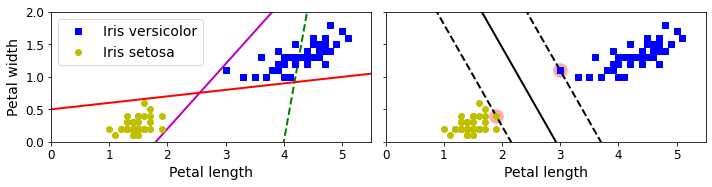

In [116]:
# Generation of plots

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

## Sensitivity to feature scales

The UUID is **#S5C6**. You can use it to refer to the slides in Session 5.

Here we show that the scale it is extremely important for SVMs

### Create some fake data

In [117]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

### Fit the SVM without scaling the data

We tweak the "C" parameter, we will see soon for what we use it.

In [31]:
svm_clf_unscaled = SVC(kernel="linear", C=100)
svm_clf_unscaled.fit(Xs, ys)

SVC(C=100, kernel='linear')

### Fit the SVM scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

svm_clf_scaled = SVC(kernel="linear", C=100)
svm_clf_scaled.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

### Plotting the results

Saving figure sensitivity_to_feature_scales_plot


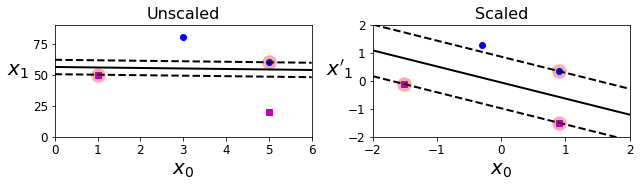

In [118]:
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_unscaled, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

## Soft margin classification - outlier detection
The UUID is **#S5C7**. You can use it to refer to the slides in Session 5.

Saving figure sensitivity_to_outliers_plot


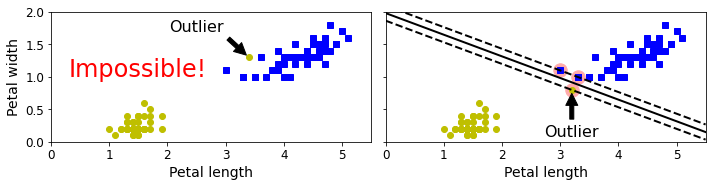

In [34]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

## Outliers and hyperparameter C

The UUID is **#S5C8**. You can use it to refer to the slides in Session 5.


This is the first code example in chapter 5:

In [119]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [120]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

In [121]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [122]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


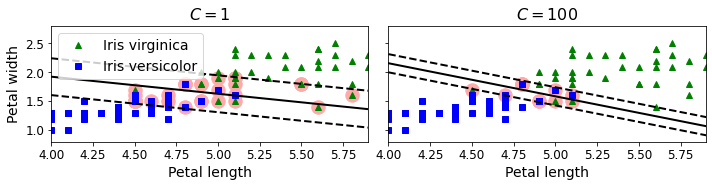

In [123]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

## Non-linear classification



### Polynomial expansion

The UUID is **#S5C9**. You can use it to refer to the slides in Session 5.

Saving figure higher_dimensions_plot


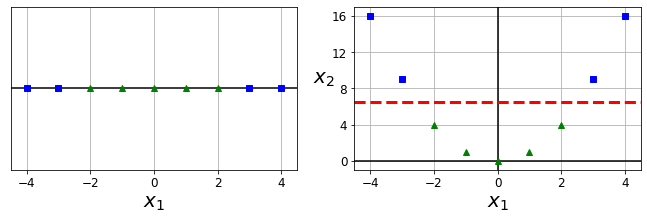

In [40]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

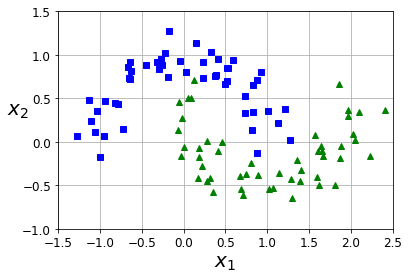

In [41]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [42]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Saving figure moons_polynomial_svc_plot


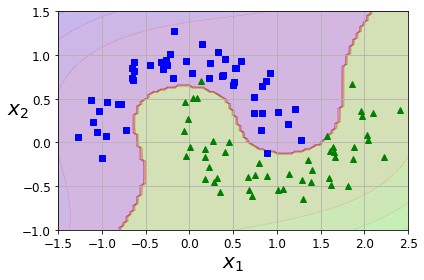

In [43]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

### Kernel trick

The UUID is **#S5C10**. You can use it to refer to the slides in Session 5.

In [44]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [45]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


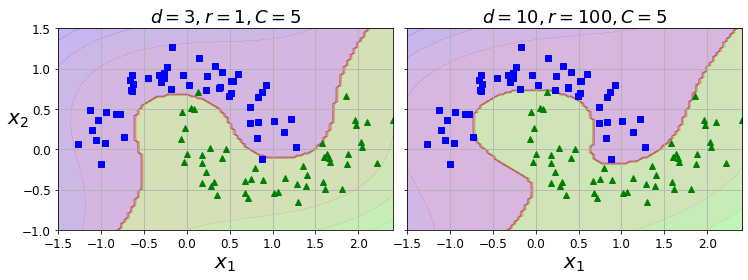

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Regression with SVMs

The UUID is **#S5C11**. You can use it to refer to the slides in Session 5.


In [47]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [48]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [49]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


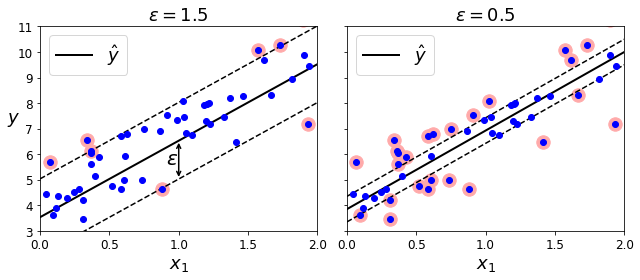

In [50]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [51]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**Note**: to be future-proof, we set `gamma="scale"`, as this will be the default value in Scikit-Learn 0.22.

In [52]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [53]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


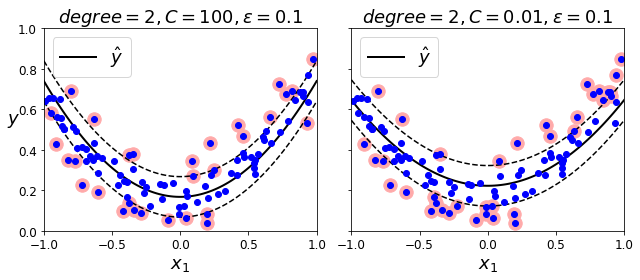

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()